# Summary Statistics

In descriptive statistics, summary statistics are used to summarize a set of observations, in order to communicate the largest amount of information as simply as possible.

* **Location** :
Common measures of location, or central tendency, are the 
    1. Arithmetic mean, 
    2. Median, 
    3. Mode.
* **Spread**:Common measures of statistical dispersion are the 
    1.  Range, 
    4. Interquartile range,, 
    2. Variance, 
    3. Standard deviation

* **Shape**
    1. skewness, 
    2. kurtosis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data1 = [99,86,87,88,102,86,104,87,94,78,77,85,86,92,93,85,90,96,93,97,80,81,80,81,82]

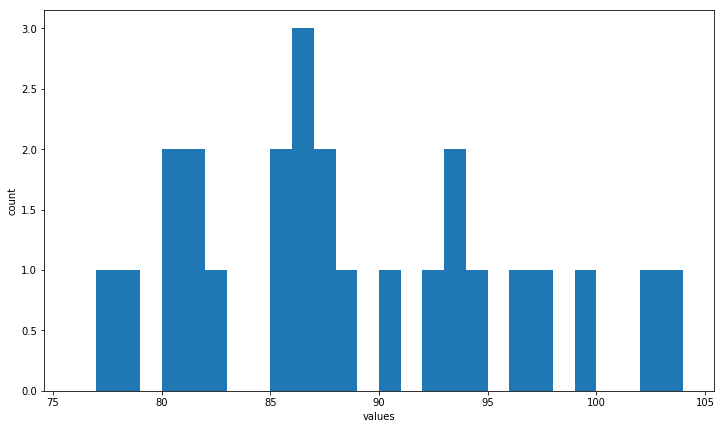

In [5]:
def histo(x):
    # create histogram
    bin_edges = np.arange(min(x) - 1, max(x) + 1, 1)
    plt.figure(figsize=(12,7))
    fig = plt.hist(x, bins=bin_edges)
    plt.xlabel('values')
    plt.ylabel('count')
    
    
histo(data1)

### Sample Mean:

$$\bar{x} = \frac{1}{n}\sum_{i=1}^n = x_i$$

In [6]:
sum(i for i in data1) / len(data1)

88.36

In [7]:
data1_mean = np.mean(data1)
data1_mean

88.36

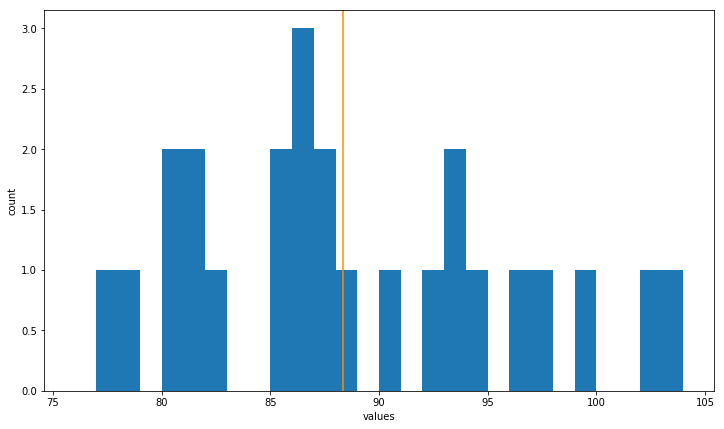

In [8]:
histo(data1)
plt.axvline(data1_mean, color='darkorange')
plt.show()

### Mode:

In [9]:
data1_mode=stats.mode(data1)
data1_mode

ModeResult(mode=array([86]), count=array([3]))

## Median

In [10]:
x = np.sort(data1)

n = len(x)
midpoint=n//2

if n % 2==1:
    median =x[midpoint]
else:
    median = (x[midpoint-1]+x[midpoint])/2
    
print(x)
print(n)
print(midpoint)
print(median)

[ 77  78  80  80  81  81  82  85  85  86  86  86  87  87  88  90  92  93
  93  94  96  97  99 102 104]
25
12
87


In [11]:
data1_median = np.median(data1)
data1_median

87.0

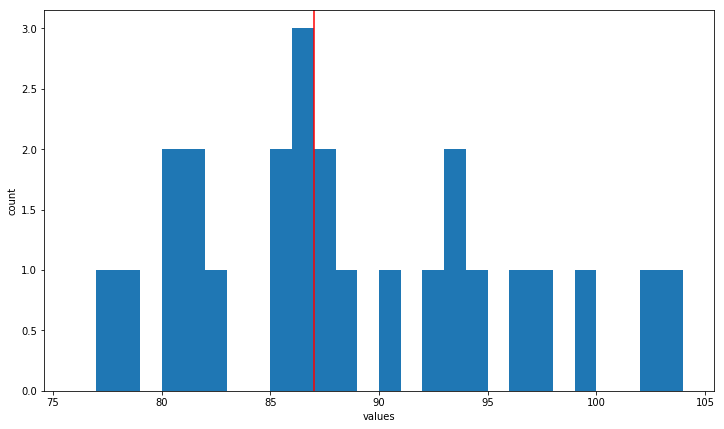

In [12]:
histo(data1)
plt.axvline(data1_median, color='red')
plt.show()

### Min/Max:

In [13]:
data1_min=np.min(data1)
data1_min

77

In [14]:
data1_max=np.max(data1)
data1_max

104

### Range

In [15]:
data1_range=data1_max-data1_min
data1_range

27

### 25th and 75th Percentile:

In [16]:
x = np.sort(data1)
Q1 = x[round(0.25 * x.shape[0])]
Q1

82

In [17]:
Q3 = x[round(0.75 * x.shape[0])-1]
Q3

93

In [18]:
data1_Q1=np.percentile(x, q=[25], interpolation='lower')
data1_Q1

array([82])

In [19]:
data1_Q3=np.percentile(x, q=[75], interpolation='lower')
data1_Q3

array([93])

### Interquartile range (IQR) 

In [20]:
IQR = data1_Q3 - data1_Q1    # Interquartile range (IQR)
  
print(IQR) 

[11]


In [21]:
data1_IQR = stats.iqr(data1, interpolation = 'midpoint') 
  
print(data1_IQR) 

11.0


### Variance

$$Var_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [22]:
variance=sum([(i - data1_mean)**2 for i in data1]) / (len(data1) - 1)
variance

55.65666666666666

In [23]:
data1_var = np.var(data1, ddof=1)
data1_var

55.656666666666666

### Sample Standard Deviation:

$$Std_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

In [24]:
Standard_Deviation=(sum([(i - data1_mean)**2 for i in data1]) / (len(data1) - 1))**0.5
Standard_Deviation

7.460339581189764

In [25]:
Standard_Deviation=np.sqrt(np.var(data1, ddof=1))
Standard_Deviation

7.460339581189764

In [26]:
data1_std = np.std(data1, ddof=1)
data1_std

7.460339581189764

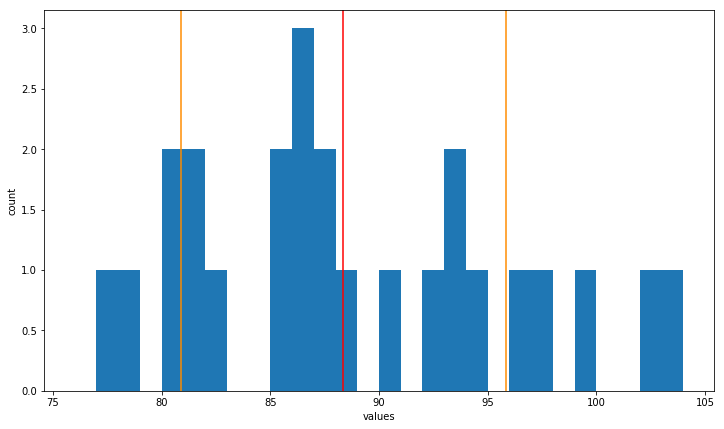

In [27]:
histo(data1)
plt.axvline(data1_mean + data1_std, color='darkorange')
plt.axvline(data1_mean - data1_std, color='darkorange')
plt.axvline(data1_mean, color='red')
plt.show()

# Outliers VS (Measures of Central Tendency & Measures of Dispersion)



In [30]:
# read dataset
df1 = pd.read_csv('sampels.csv')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
sample1    25 non-null int64
sample2    25 non-null int64
sample3    25 non-null int64
dtypes: int64(3)
memory usage: 680.0 bytes


In [32]:
df1.head()

,sample1,sample2,sample3
0,99,99,99
1,86,86,86
2,87,87,87
3,88,88,88
4,102,102,102


In [33]:
df1.describe()

,sample1,sample2,sample3
count,25.000000,25.00000,25.000000
mean,86.080000,88.36000,91.800000
std,15.478264,7.46034,21.530985
min,20.000000,77.00000,77.000000
25%,82.000000,82.00000,82.000000
50%,87.000000,87.00000,87.000000
75%,93.000000,93.00000,93.000000
max,104.000000,104.00000,190.000000


In [34]:
df1.mode()

,sample1,sample2,sample3
0,86,86,86
